# Trabajo Práctico Final - Control Digital - MSE
## Universidad de Buenos Aires
## Esp. Ing. Santiago Esteva

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def calculaterisetime( signal, time ,min, max) :
    min_value = np.min(min)
    max_value = np.max(max)
    # Find the index where the signal first  crosses the start threshold
    startindex = np.argmax( signal >  min_value)
    # Find the index where the signal crosses the end threshold
    endindex = np.argmax ( signal > max_value)
    # Calculatt the rise time as the difference between the two indices
    risetime = time[ endindex ] - time [startindex]
    return risetime

La planta utilziada en el trabajo corresponde a la siguiente imagen con:

$R1 = 2.2 \mathsf{k\Omega}$

$C1 = 1 \mu F$

$R2 = 100 \mathsf{\Omega}$

$C2 = 1 \mu F$

![Planta](Fig_TP.png)


Analizamos el sistema a lazo abierto enviando una señal cuadrada de 10 Hz

Tiempo se subida de la salida a lazo abierto:  0.10204081632653061


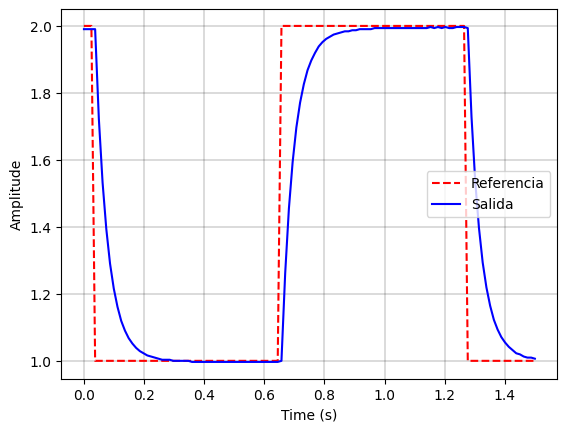

In [114]:
r = [ 2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000]
y = [ 1.99032,1.99032,1.99032,1.99032,1.72258,1.53226,1.39355,1.29032,1.21613,1.16129,1.11935,1.09032,1.06774,1.05161,1.03871,1.02903,1.02258,1.01613,1.01290,1.00968,1.00645,1.00323,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.00000,1.26129,1.45484,1.59355,1.69677,1.77097,1.82581,1.86774,1.89677,1.91935,1.93871,1.95161,1.96129,1.96774,1.97419,1.97742,1.98064,1.98387,1.98387,1.98710,1.98710,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99355,1.99677,1.99355,1.99677,1.99355,1.99355,1.99677,1.99677,1.99677,1.99355,1.72903,1.53548,1.39677,1.29355,1.21935,1.16452,1.12258,1.09355,1.07097,1.05484,1.04194,1.03226,1.02258,1.01935,1.01290,1.00968,1.00968,1.00645]

t = np.linspace(0, 1.5, len(r))

Init = 52
Fin = 102
yrise = y[Init:Fin]
trise = np.linspace(0, 1, len(yrise))
rTime_ol = calculaterisetime( yrise, trise,1.1,1.8)
print("Tiempo se subida de la salida a lazo abierto: ",rTime_ol)

# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

## Identificación

Utilizando el código de matlabr [practica_2.m](practica_2.m) se ejecutan los algoritmos de LS y RLS. Para analizar el resultado se toma una muestra a lazo abierto del sistema.

Para generar la señal random se utiliza el código de [implementacion_pid_rtos](implementacion_pid_rtos) donde se agrega el define IDENT en el archivo [pid_controller.h](implementacion_pid_rtos/inc/pid_controller.h) para generar una señal random en la referencia y ver la  respuesta de la planta con dicha salida.

Esos datos se obtienen por terminal serie y se ingresan al script de matlab para generar la identificación.

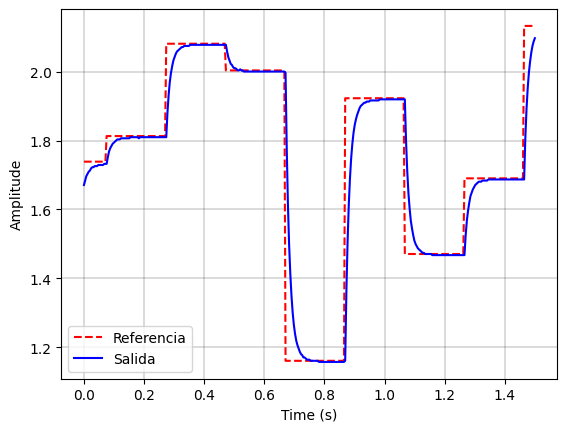

In [128]:
r = [ 1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226]
y = [ 1.67097,1.68387,1.69677,1.70323,1.70968,1.71290,1.71935,1.72258,1.72258,1.72581,1.72581,1.72581,1.72903,1.72903,1.72903,1.72903,1.72903,1.73226,1.73226,1.73226,1.75161,1.76774,1.77742,1.78387,1.79032,1.79355,1.79677,1.80000,1.80323,1.80323,1.80323,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80645,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.88064,1.93226,1.97097,1.99677,2.01613,2.03226,2.04194,2.05161,2.05806,2.06129,2.06452,2.06774,2.07097,2.07097,2.07419,2.07419,2.07419,2.07419,2.07419,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.05806,2.04194,2.03226,2.02258,2.01935,2.01290,2.00968,2.00968,2.00645,2.00323,2.00323,2.00645,2.00323,2.00323,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.99677,1.77742,1.61290,1.49677,1.41290,1.34839,1.30000,1.26452,1.23871,1.21935,1.20645,1.19677,1.18710,1.18064,1.17742,1.17097,1.17097,1.16774,1.16452,1.16452,1.16452,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.16129,1.36129,1.50645,1.61290,1.69032,1.74839,1.79032,1.82258,1.84516,1.86129,1.87419,1.88387,1.89355,1.90000,1.90323,1.90645,1.90968,1.90968,1.91290,1.91290,1.91290,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.80000,1.71290,1.64839,1.60323,1.56774,1.54516,1.52581,1.50968,1.50000,1.49355,1.48710,1.48387,1.48064,1.47742,1.47419,1.47419,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.52581,1.56774,1.59677,1.61935,1.63871,1.64839,1.65806,1.66452,1.67097,1.67419,1.67742,1.68064,1.68064,1.68064,1.68387,1.68387,1.68387,1.68387,1.68387,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.80645,1.89032,1.95161,1.99677,2.02903,2.05484,2.07419,2.08710,2.09677]

t = np.linspace(0, 1.5, len(r))

# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

### LS

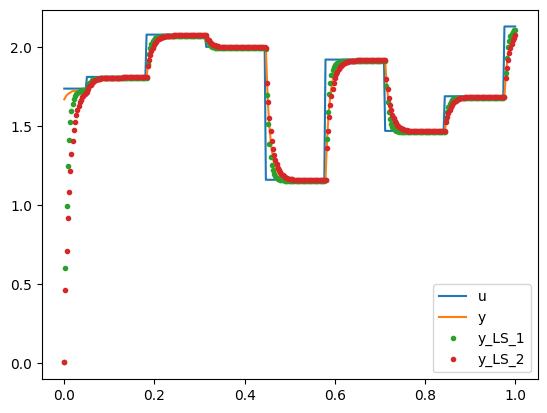

In [127]:
numz_1 = [2.4230e-03,3.4264e-01]
denz_1 = [1.0000,-0.6532]

numz_2 = [2.6199e-03,2.6100e-01,-3.5291e-02]
denz_2 = [1.000000,-0.676403,-0.094804]

u = [ 1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226]
y = [ 1.67097,1.68387,1.69677,1.70323,1.70968,1.71290,1.71935,1.72258,1.72258,1.72581,1.72581,1.72581,1.72903,1.72903,1.72903,1.72903,1.72903,1.73226,1.73226,1.73226,1.75161,1.76774,1.77742,1.78387,1.79032,1.79355,1.79677,1.80000,1.80323,1.80323,1.80323,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80645,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.88064,1.93226,1.97097,1.99677,2.01613,2.03226,2.04194,2.05161,2.05806,2.06129,2.06452,2.06774,2.07097,2.07097,2.07419,2.07419,2.07419,2.07419,2.07419,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.05806,2.04194,2.03226,2.02258,2.01935,2.01290,2.00968,2.00968,2.00645,2.00323,2.00323,2.00645,2.00323,2.00323,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.99677,1.77742,1.61290,1.49677,1.41290,1.34839,1.30000,1.26452,1.23871,1.21935,1.20645,1.19677,1.18710,1.18064,1.17742,1.17097,1.17097,1.16774,1.16452,1.16452,1.16452,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.16129,1.36129,1.50645,1.61290,1.69032,1.74839,1.79032,1.82258,1.84516,1.86129,1.87419,1.88387,1.89355,1.90000,1.90323,1.90645,1.90968,1.90968,1.91290,1.91290,1.91290,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.80000,1.71290,1.64839,1.60323,1.56774,1.54516,1.52581,1.50968,1.50000,1.49355,1.48710,1.48387,1.48064,1.47742,1.47419,1.47419,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.52581,1.56774,1.59677,1.61935,1.63871,1.64839,1.65806,1.66452,1.67097,1.67419,1.67742,1.68064,1.68064,1.68064,1.68387,1.68387,1.68387,1.68387,1.68387,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.80645,1.89032,1.95161,1.99677,2.02903,2.05484,2.07419,2.08710,2.09677]

y_LS_1 = sig.lfilter(numz_1, denz_1, u)
y_LS_2 = sig.lfilter(numz_2, denz_2, u)

t = np.linspace(0, 1, len(u))

fig, ax = plt.subplots()
ax.plot(t, u, label='u')
ax.plot(t, y, label='y')
ax.plot(t, y_LS_1,'.', label='y_LS_1')
ax.plot(t, y_LS_2,'.', label='y_LS_2')
ax.legend()
plt.show()

### RLS

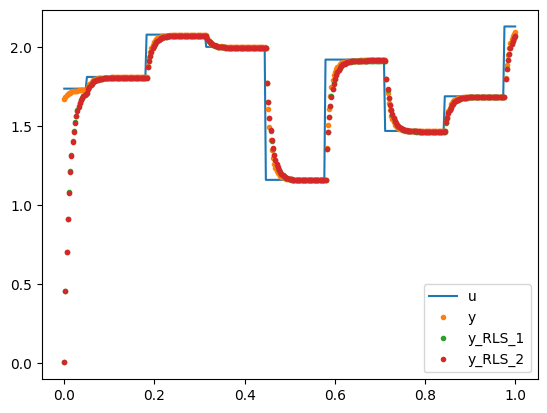

In [129]:
numz_1 = [4.4636e-03,2.5637e-01,-3.1169e-02]
denz_1 = [1.0000,-0.6651,-0.1045]

numz_2 = [3.0450e-03,2.5940e-01,-3.8125e-02]
denz_2 = [1.000000,-0.680025,-0.095019]

u = [ 1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.73871,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,1.81290,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.08064,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,2.00323,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.92258,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,1.69032,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226,2.13226]
y = [ 1.67097,1.68387,1.69677,1.70323,1.70968,1.71290,1.71935,1.72258,1.72258,1.72581,1.72581,1.72581,1.72903,1.72903,1.72903,1.72903,1.72903,1.73226,1.73226,1.73226,1.75161,1.76774,1.77742,1.78387,1.79032,1.79355,1.79677,1.80000,1.80323,1.80323,1.80323,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80645,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80645,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.80968,1.88064,1.93226,1.97097,1.99677,2.01613,2.03226,2.04194,2.05161,2.05806,2.06129,2.06452,2.06774,2.07097,2.07097,2.07419,2.07419,2.07419,2.07419,2.07419,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.07742,2.05806,2.04194,2.03226,2.02258,2.01935,2.01290,2.00968,2.00968,2.00645,2.00323,2.00323,2.00645,2.00323,2.00323,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.99677,1.77742,1.61290,1.49677,1.41290,1.34839,1.30000,1.26452,1.23871,1.21935,1.20645,1.19677,1.18710,1.18064,1.17742,1.17097,1.17097,1.16774,1.16452,1.16452,1.16452,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.16129,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.15806,1.16129,1.36129,1.50645,1.61290,1.69032,1.74839,1.79032,1.82258,1.84516,1.86129,1.87419,1.88387,1.89355,1.90000,1.90323,1.90645,1.90968,1.90968,1.91290,1.91290,1.91290,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91613,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.91935,1.80000,1.71290,1.64839,1.60323,1.56774,1.54516,1.52581,1.50968,1.50000,1.49355,1.48710,1.48387,1.48064,1.47742,1.47419,1.47419,1.47097,1.47097,1.47097,1.47097,1.47097,1.47097,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.46774,1.52581,1.56774,1.59677,1.61935,1.63871,1.64839,1.65806,1.66452,1.67097,1.67419,1.67742,1.68064,1.68064,1.68064,1.68387,1.68387,1.68387,1.68387,1.68387,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.68710,1.80645,1.89032,1.95161,1.99677,2.02903,2.05484,2.07419,2.08710,2.09677]

y_RLS_1 = sig.lfilter(numz_1, denz_1, u)
y_RLS_2 = sig.lfilter(numz_2, denz_2, u)

t = np.linspace(0, 1, len(u))

fig, ax = plt.subplots()
ax.plot(t, u, label='u')
ax.plot(t, y, '.', label='y')
ax.plot(t, y_RLS_1, '.', label='y_RLS_1')
ax.plot(t, y_RLS_2, '.', label='y_RLS_2')
ax.legend()
plt.show()

## PID CONTROL

Lo primero que se hace es probar el código de control PID en la placa EDU-CIAA definiendo una planta conocida y aplicando un control. El código se encuentra en la carpeta [pid_control](pid_control)

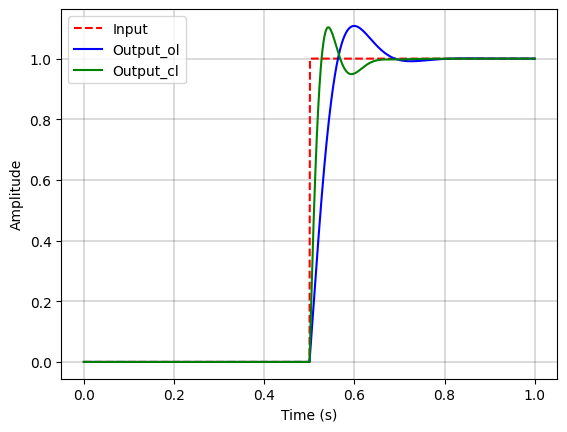

In [118]:
N = 1000
N2 = 501

u_cero = np.zeros(N2,dtype=float)

u = np.append(u_cero,np.ones(N-len(u_cero)))

y_ol = np.append(u_cero,[0.020100,0.040392,0.060848,0.081442,0.102146,0.122937,0.143790,0.164682,0.185590,0.206493,
0.227370,0.248201,0.268968,0.289651,0.310234,0.330700,0.351033,0.371218,0.391240,0.411086,0.430743,0.450199,0.469442,0.488461,0.507246,
0.525788,0.544077,0.562104,0.579864,0.597347,0.614547,0.631459,0.648077,0.664394,0.680409,0.696114,0.711509,0.726588,0.741350,0.755791,
0.769911,0.783708,0.797180,0.810327,0.823148,0.835643,0.847814,0.859659,0.871180,0.882379,0.893256,0.903813,0.914053,0.923978,0.933589,
0.942891,0.951884,0.960574,0.968962,0.977053,0.984849,0.992355,0.999574,1.006511,1.013170,1.019554,1.025669,1.031518,1.037106,1.042439,
1.047519,1.052353,1.056945,1.061300,1.065422,1.069318,1.072991,1.076448,1.079693,1.082730,1.085566,1.088205,1.090653,1.092914,1.094993,
1.096896,1.098627,1.100192,1.101595,1.102841,1.103936,1.104883,1.105689,1.106357,1.106893,1.107301,1.107586,1.107752,1.107803,1.107745,
1.107581,1.107316,1.106954,1.106500,1.105956,1.105328,1.104619,1.103834,1.102975,1.102047,1.101053,1.099997,1.098882,1.097712,1.096490,
1.095219,1.093903,1.092545,1.091147,1.089713,1.088245,1.086747,1.085220,1.083668,1.082094,1.080499,1.078885,1.077257,1.075614,1.073961,
1.072298,1.070628,1.068953,1.067275,1.065595,1.063915,1.062237,1.060563,1.058893,1.057230,1.055575,1.053929,1.052294,1.050671,1.049060,
1.047463,1.045882,1.044316,1.042768,1.041237,1.039726,1.038233,1.036761,1.035310,1.033880,1.032472,1.031087,1.029725,1.028386,1.027072,
1.025782,1.024517,1.023276,1.022061,1.020872,1.019708,1.018570,1.017459,1.016373,1.015314,1.014282,1.013275,1.012295,1.011340,1.010412,
1.009511,1.008635,1.007784,1.006960,1.006161,1.005387,1.004638,1.003914,1.003214,1.002539,1.001888,1.001261,1.000656,1.000075,0.999517,
0.998981,0.998468,0.997976,0.997505,0.997056,0.996627,0.996218,0.995829,0.995460,0.995109,0.994778,0.994465,0.994169,0.993891,0.993631,
0.993386,0.993159,0.992946,0.992750,0.992568,0.992401,0.992248,0.992109,0.991984,0.991871,0.991771,0.991683,0.991607,0.991543,0.991489,
0.991446,0.991414,0.991391,0.991378,0.991374,0.991379,0.991392,0.991414,0.991443,0.991480,0.991524,0.991575,0.991632,0.991695,0.991764,
0.991839,0.991919,0.992004,0.992094,0.992189,0.992287,0.992389,0.992495,0.992605,0.992717,0.992833,0.992951,0.993072,0.993195,0.993320,
0.993446,0.993575,0.993705,0.993836,0.993968,0.994101,0.994235,0.994369,0.994504,0.994639,0.994775,0.994910,0.995045,0.995180,0.995314,
0.995448,0.995581,0.995713,0.995845,0.995975,0.996105,0.996233,0.996360,0.996486,0.996611,0.996733,0.996855,0.996975,0.997093,0.997210,
0.997325,0.997439,0.997550,0.997660,0.997767,0.997873,0.997977,0.998078,0.998178,0.998276,0.998371,0.998465,0.998556,0.998646,0.998733,
0.998818,0.998901,0.998982,0.999061,0.999138,0.999213,0.999285,0.999356,0.999424,0.999491,0.999555,0.999618,0.999678,0.999736,0.999793,
0.999847,0.999900,0.999950,0.999999,1.000046,1.000091,1.000134,1.000176,1.000216,1.000254,1.000290,1.000325,1.000358,1.000390,1.000420,
1.000448,1.000475,1.000501,1.000525,1.000547,1.000569,1.000588,1.000607,1.000624,1.000640,1.000655,1.000669,1.000681,1.000693,1.000703,
1.000712,1.000721,1.000728,1.000734,1.000740,1.000744,1.000748,1.000751,1.000753,1.000755,1.000755,1.000755,1.000754,1.000753,1.000751,
1.000748,1.000745,1.000742,1.000738,1.000733,1.000728,1.000723,1.000717,1.000710,1.000703,1.000696,1.000688,1.000680,1.000672,1.000664,
1.000655,1.000646,1.000637,1.000627,1.000617,1.000607,1.000597,1.000587,1.000577,1.000567,1.000556,1.000546,1.000535,1.000525,1.000514,
1.000503,1.000493,1.000482,1.000472,1.000461,1.000450,1.000440,1.000429,1.000419,1.000408,1.000397,1.000387,1.000376,1.000366,1.000355,
1.000345,1.000335,1.000325,1.000315,1.000305,1.000296,1.000286,1.000277,1.000267,1.000258,1.000249,1.000241,1.000232,1.000224,1.000216,
1.000209,1.000201,1.000193,1.000186,1.000179,1.000172,1.000165,1.000159,1.000152,1.000146,1.000140,1.000134,1.000129,1.000123,1.000118,
1.000113,1.000108,1.000103,1.000098,1.000093,1.000089,1.000085,1.000080,1.000076,1.000072,1.000068,1.000064,1.000060,1.000057,1.000053,
1.000050,1.000047,1.000044,1.000041,1.000039,1.000036,1.000033,1.000031,1.000029,1.000027,1.000025,1.000023,1.000021,1.000020,1.000018,
1.000017,1.000015,1.000014,1.000013,1.000011,1.000010,1.000009,1.000008,1.000008,1.000007,1.000006,1.000006,1.000005,1.000005,1.000005,
1.000005,1.000005,1.000004,1.000004,1.000004,1.000004,1.000005,1.000005,1.000005,1.000005,1.000005,1.000006,1.000006,1.000006,1.000006,
1.000007,1.000007,1.000007,1.000008,1.000008,1.000008,1.000009,1.000009,1.000009])

y_cl = np.append(u_cero,[0.052260,0.106627,0.160243,0.212875,0.264411,0.314746,0.363783,0.411433,0.457618,0.502271,
0.545334,0.586760,0.626510,0.664555,0.700874,0.735452,0.768285,0.799371,0.828720,0.856344,0.882261,0.906496,0.929076,0.950036,0.969411,
0.987241,1.003570,1.018443,1.031908,1.044016,1.054818,1.064368,1.072721,1.079930,1.086052,1.091143,1.095258,1.098454,1.100786,1.102309,
1.103078,1.103144,1.102562,1.101382,1.099655,1.097428,1.094749,1.091663,1.088215,1.084447,1.080400,1.076112,1.071621,1.066961,1.062167,
1.057270,1.052299,1.047282,1.042247,1.037217,1.032215,1.027261,1.022376,1.017576,1.012879,1.008298,1.003847,0.999538,0.995379,0.991381,
0.987551,0.983895,0.980419,0.977126,0.974020,0.971103,0.968375,0.965838,0.963490,0.961331,0.959358,0.957570,0.955961,0.954530,0.953272,
0.952181,0.951254,0.950485,0.949868,0.949398,0.949067,0.948871,0.948803,0.948855,0.949022,0.949297,0.949673,0.950144,0.950702,0.951343,
0.952059,0.952844,0.953691,0.954596,0.955551,0.956551,0.957591,0.958665,0.959769,0.960897,0.962044,0.963207,0.964380,0.965559,0.966742,
0.967924,0.969101,0.970271,0.971431,0.972578,0.973709,0.974822,0.975915,0.976986,0.978033,0.979054,0.980049,0.981017,0.981955,0.982864,
0.983742,0.984589,0.985406,0.986190,0.986943,0.987663,0.988352,0.989009,0.989635,0.990230,0.990794,0.991328,0.991832,0.992308,0.992755,
0.993175,0.993568,0.993935,0.994278,0.994596,0.994891,0.995164,0.995415,0.995646,0.995857,0.996050,0.996225,0.996384,0.996527,0.996655,
0.996769,0.996870,0.996959,0.997037,0.997104,0.997162,0.997211,0.997252,0.997285,0.997312,0.997333,0.997348,0.997359,0.997366,0.997369,
0.997368,0.997365,0.997360,0.997354,0.997346,0.997337,0.997327,0.997317,0.997308,0.997299,0.997290,0.997282,0.997276,0.997270,0.997266,
0.997263,0.997262,0.997263,0.997265,0.997269,0.997275,0.997284,0.997293,0.997305,0.997319,0.997335,0.997352,0.997372,0.997393,0.997416,
0.997441,0.997468,0.997496,0.997525,0.997556,0.997588,0.997622,0.997656,0.997692,0.997729,0.997766,0.997804,0.997843,0.997883,0.997923,
0.997963,0.998004,0.998046,0.998087,0.998129,0.998171,0.998213,0.998255,0.998297,0.998338,0.998380,0.998420,0.998461,0.998501,0.998541,
0.998580,0.998619,0.998657,0.998694,0.998731,0.998768,0.998803,0.998838,0.998872,0.998906,0.998938,0.998970,0.999001,0.999031,0.999061,
0.999089,0.999117,0.999144,0.999170,0.999195,0.999219,0.999243,0.999265,0.999287,0.999308,0.999329,0.999348,0.999367,0.999386,0.999403,
0.999420,0.999437,0.999452,0.999468,0.999482,0.999496,0.999510,0.999523,0.999535,0.999547,0.999559,0.999570,0.999581,0.999592,0.999602,
0.999611,0.999620,0.999629,0.999637,0.999645,0.999653,0.999660,0.999668,0.999675,0.999681,0.999688,0.999694,0.999700,0.999706,0.999711,
0.999716,0.999721,0.999726,0.999731,0.999736,0.999741,0.999746,0.999750,0.999755,0.999759,0.999763,0.999768,0.999772,0.999776,0.999780,
0.999783,0.999787,0.999790,0.999794,0.999798,0.999801,0.999805,0.999808,0.999812,0.999816,0.999819,0.999823,0.999826,0.999830,0.999833,
0.999837,0.999840,0.999843,0.999846,0.999850,0.999853,0.999856,0.999859,0.999862,0.999865,0.999868,0.999871,0.999874,0.999876,0.999879,
0.999882,0.999885,0.999887,0.999890,0.999892,0.999895,0.999897,0.999899,0.999902,0.999904,0.999906,0.999908,0.999910,0.999912,0.999914,
0.999916,0.999918,0.999920,0.999922,0.999924,0.999926,0.999927,0.999929,0.999931,0.999932,0.999934,0.999935,0.999936,0.999938,0.999939,
0.999940,0.999941,0.999942,0.999943,0.999944,0.999945,0.999946,0.999947,0.999948,0.999948,0.999949,0.999950,0.999951,0.999951,0.999952,
0.999953,0.999954,0.999954,0.999955,0.999956,0.999957,0.999958,0.999959,0.999959,0.999960,0.999961,0.999962,0.999962,0.999963,0.999964,
0.999965,0.999965,0.999966,0.999967,0.999968,0.999969,0.999969,0.999970,0.999971,0.999971,0.999972,0.999973,0.999974,0.999974,0.999975,
0.999976,0.999976,0.999977,0.999977,0.999978,0.999979,0.999979,0.999980,0.999980,0.999981,0.999981,0.999982,0.999982,0.999982,0.999983,
0.999984,0.999984,0.999985,0.999985,0.999985,0.999986,0.999986,0.999987,0.999987,0.999987,0.999988,0.999988,0.999988,0.999989,0.999989,
0.999989,0.999990,0.999990,0.999990,0.999990,0.999990,0.999990,0.999991,0.999991,0.999991,0.999992,0.999992,0.999992,0.999992,0.999993,
0.999993,0.999993,0.999993,0.999993,0.999993,0.999994,0.999994,0.999994,0.999994,0.999994,0.999995,0.999995,0.999995,0.999995,0.999996,
0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999997,
0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999998])

t = np.linspace(0, 1, N)

# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, u, 'r--', label='Input')
plt.plot(t, y_ol, 'b-', label='Output_ol')
plt.plot(t, y_cl, 'g-', label='Output_cl')
# plt.plot(t, y_cl2, 'k-', label='Output_cl2')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

## Control PID RTOS

Lo siguiente a probar es el control PID en la placa, para esto se utilza el código de la carpeta [implementacion_pid_rtos](implementacion_pid_rtos). Analizamos la señal a lazo abierto, para esto se debe descomentando la line 66 del archivo [pid_controller.h](implementacion_pid_rtos/inc/pid_controller.h) que dice  #define OPEN_LOOP

### Lazo abierto

Tiempo se subida de la salida a lazo abierto:  0.10204081632653061


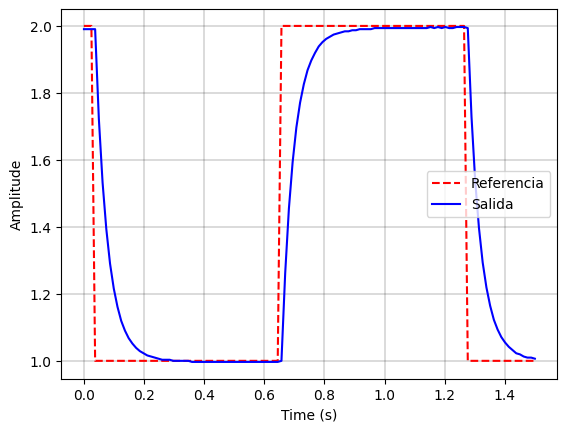

In [119]:
r = [ 2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000]
y = [ 1.99032,1.99032,1.99032,1.99032,1.72258,1.53226,1.39355,1.29032,1.21613,1.16129,1.11935,1.09032,1.06774,1.05161,1.03871,1.02903,1.02258,1.01613,1.01290,1.00968,1.00645,1.00323,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.00000,1.26129,1.45484,1.59355,1.69677,1.77097,1.82581,1.86774,1.89677,1.91935,1.93871,1.95161,1.96129,1.96774,1.97419,1.97742,1.98064,1.98387,1.98387,1.98710,1.98710,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99355,1.99677,1.99355,1.99677,1.99355,1.99355,1.99677,1.99677,1.99677,1.99355,1.72903,1.53548,1.39677,1.29355,1.21935,1.16452,1.12258,1.09355,1.07097,1.05484,1.04194,1.03226,1.02258,1.01935,1.01290,1.00968,1.00968,1.00645]

t = np.linspace(0, 1.5, len(r))

Init = 52
Fin = 102
yrise = y[Init:Fin]
trise = np.linspace(0, 1, len(yrise))
rTime_ol = calculaterisetime( yrise, trise,1.1,1.8)
print("Tiempo se subida de la salida a lazo abierto: ",rTime_ol)

# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

### Lazo cerrado

Primero se realizan los cálculos de las ganancias del PID con el Jupyter [Ajuste PID.ipynb](Ajuste PID.ipynb). En este caso se inicia con el método Ziegler-Nichols con respuesta al escalón aplicando las ganancias en el código se ve que el valor proporcioanl obtenido era elevado, por ello se finaliza el ajuste cone l método de prueba y error hasta llegar a las ganancias finales :

Kp = 1.5
Ki= 0.02
Kd = 0.005

Tiempo se subida de la salida a lazo abierto:  0.10204081632653061
Tiempo se subida de la salida con control PID:  0.04081632653061224
Mejora en el tiempo se subida:  160.0
Sobre pico PID:  -7.902999999999993


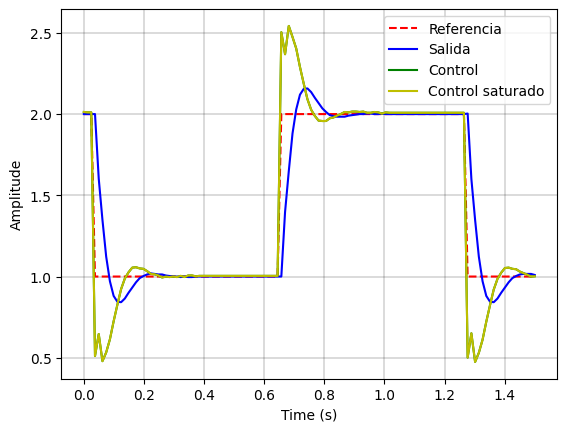

In [120]:
#Control PID Con Kp = 1.5 Ki= 0.02 Kd= 0.005
r = [ 2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000]
y = [ 2.00000,2.00000,2.00000,2.00000,1.60323,1.34839,1.12258,0.97097,0.88065,0.84516,0.84194,0.86452,0.90000,0.93226,0.96452,0.99032,1.00323,1.01290,1.01935,1.01613,1.01290,1.01290,1.00645,1.00323,1.00000,1.00000,0.99677,1.00000,0.99677,0.99677,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.39677,1.64839,1.88064,2.02903,2.11935,2.15484,2.15806,2.13548,2.10000,2.06774,2.03548,2.01290,1.99355,1.98710,1.98387,1.98387,1.98387,1.99032,1.99355,1.99677,2.00000,2.00000,2.00323,2.00323,2.00000,2.00000,2.00323,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00323,1.60000,1.34839,1.12258,0.97097,0.88065,0.84516,0.84194,0.86452,0.90000,0.93226,0.96452,0.99032,1.00323,1.01290,1.01613,1.01613,1.01613,1.00968]
u = [ 2.01279,2.01055,2.01049,0.51049,0.64597,0.47904,0.53286,0.61348,0.72455,0.82604,0.92240,0.98759,1.02606,1.05479,1.05727,1.04989,1.04735,1.03301,1.01608,1.01354,1.00646,0.99442,0.99909,0.99684,0.99920,0.99684,1.00398,0.99690,1.00635,1.00652,1.00168,1.00399,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00405,1.00405,1.00405,1.00405,2.50405,2.36856,2.54270,2.47460,2.40331,2.29004,2.18850,2.09214,2.02695,1.98848,1.95975,1.95728,1.95745,1.97427,1.97929,1.99121,2.00088,2.01292,2.01062,2.01528,2.01534,2.01292,2.01528,2.00814,2.00803,2.01286,2.01056,2.00331,2.01039,2.00814,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,0.50089,0.65066,0.47439,0.53040,0.61107,0.72215,0.82364,0.92000,0.98519,1.02366,1.05239,1.05486,1.04749,1.04495,1.03061,1.02087,1.01126,0.99922,1.00152]
uSat = [ 2.01279,2.01055,2.01049,0.51049,0.64597,0.47904,0.53286,0.61348,0.72455,0.82604,0.92240,0.98759,1.02606,1.05479,1.05727,1.04989,1.04735,1.03301,1.01608,1.01354,1.00646,0.99442,0.99909,0.99684,0.99920,0.99684,1.00398,0.99690,1.00635,1.00652,1.00168,1.00399,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00404,1.00405,1.00405,1.00405,1.00405,2.50405,2.36856,2.54270,2.47460,2.40331,2.29004,2.18850,2.09214,2.02695,1.98848,1.95975,1.95728,1.95745,1.97427,1.97929,1.99121,2.00088,2.01292,2.01062,2.01528,2.01534,2.01292,2.01528,2.00814,2.00803,2.01286,2.01056,2.00331,2.01039,2.00814,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,2.00809,0.50089,0.65066,0.47439,0.53040,0.61107,0.72215,0.82364,0.92000,0.98519,1.02366,1.05239,1.05486,1.04749,1.04495,1.03061,1.02087,1.01126,0.99922,1.00152]

#Control PID Con Kp = 0.8 Ki= 0.02 Kd= 0.005
# r = [ 2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,]
# y = [ 1.99355,1.99677,2.00000,2.00000,1.79032,1.59677,1.41290,1.25161,1.12258,1.02903,0.95806,0.91935,0.89677,0.89355,0.90000,0.91290,0.92581,0.94516,0.96129,0.97419,0.98710,0.99677,1.00000,1.00645,1.00645,1.00968,1.00968,1.00645,1.00645,1.00323,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,0.99677,1.00000,0.99677,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.21290,1.40323,1.59032,1.74839,1.87742,1.97419,2.04194,2.08387,2.10323,2.10645,2.10323,2.08710,2.07419,2.05484,2.03871,2.02581,2.01290,2.00323,2.00000,1.99355,1.99355,1.99032,1.99032,1.99355,1.99355,1.99677,1.99677,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00323,2.00000,2.00000,2.00000,2.00000,2.00323,2.00000,1.78710,1.59355,1.40968,1.25161,1.12258,1.02903,0.95806,0.91935,0.89677,0.89355,0.89677,0.90968,0.92581,0.94516,0.96129,0.97419,0.98710,0.99355,]
# u = [ 2.01423,2.01420,2.01291,1.21417,1.06376,0.89818,0.80268,0.75765,0.74742,0.75907,0.79507,0.83000,0.87372,0.90988,0.94333,0.97039,0.99485,1.00652,1.01675,1.02320,1.02323,1.02191,1.02317,1.01681,1.01672,1.01036,1.00772,1.00772,1.00391,1.00514,1.00262,1.00130,1.00385,1.00262,1.00259,1.00259,1.00643,1.00265,1.00769,1.00394,1.00514,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.80517,1.95176,2.12113,2.21159,2.26037,2.26940,2.25388,2.22165,2.18169,2.14172,2.10436,2.06704,2.04375,2.01810,2.00640,1.99617,1.98972,1.98969,1.99101,1.98975,1.99611,1.99620,2.00256,2.00520,2.00520,2.00901,2.00778,2.01030,2.00778,2.00901,2.00904,2.00904,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00521,2.00899,2.00779,2.00776,2.00776,2.00392,1.20770,1.05991,0.89435,0.80011,0.75253,0.74353,0.75521,0.79121,0.82614,0.86986,0.90602,0.94331,0.97044,0.99231,1.00521,1.01547,1.02192,1.02195,1.02447,]
# uSat = [ 2.01423,2.01420,2.01291,1.21417,1.06376,0.89818,0.80268,0.75765,0.74742,0.75907,0.79507,0.83000,0.87372,0.90988,0.94333,0.97039,0.99485,1.00652,1.01675,1.02320,1.02323,1.02191,1.02317,1.01681,1.01672,1.01036,1.00772,1.00772,1.00391,1.00514,1.00262,1.00130,1.00385,1.00262,1.00259,1.00259,1.00643,1.00265,1.00769,1.00394,1.00514,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.00517,1.80517,1.95176,2.12113,2.21159,2.26037,2.26940,2.25388,2.22165,2.18169,2.14172,2.10436,2.06704,2.04375,2.01810,2.00640,1.99617,1.98972,1.98969,1.99101,1.98975,1.99611,1.99620,2.00256,2.00520,2.00520,2.00901,2.00778,2.01030,2.00778,2.00901,2.00904,2.00904,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00905,2.00521,2.00899,2.00779,2.00776,2.00776,2.00392,1.20770,1.05991,0.89435,0.80011,0.75253,0.74353,0.75521,0.79121,0.82614,0.86986,0.90602,0.94331,0.97044,0.99231,1.00521,1.01547,1.02192,1.02195,1.02447,]

t = np.linspace(0, 1.5, len(r))
Init = 52
Fin = 102
yrise = y[Init:Fin]
trise = np.linspace(0, 1, len(yrise))
rTime_cl = calculaterisetime( yrise, trise,1.1,1.8)
print("Tiempo se subida de la salida a lazo abierto: ",rTime_ol)
print("Tiempo se subida de la salida con control PID: ",rTime_cl)
time_dif = 100*(1-(rTime_cl-rTime_ol)/rTime_ol)
print("Mejora en el tiempo se subida: ",time_dif)

Pico = 100*(2.0-np.max(y))/2.0
print("Sobre pico PID: ",Pico)

# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.plot(t, u, 'g-', label='Control')
plt.plot(t, uSat, 'y-', label='Control saturado')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

## Control Pole Position

El control Pole Position se genera con el código de la carpeta [implementacion_pp_rtos](implementacion_pp_rtos). Nuevamente primero vemos la señal a lazo abierto (descomentando la line 25 del archivo [pp_controller.h](implementacion_pp_rtos/inc/pp_controller.h) que dice  #define OPEN_LOOP)

### Lazo abierto

Tiempo se subida de la salida a lazo abierto:  0.10204081632653067


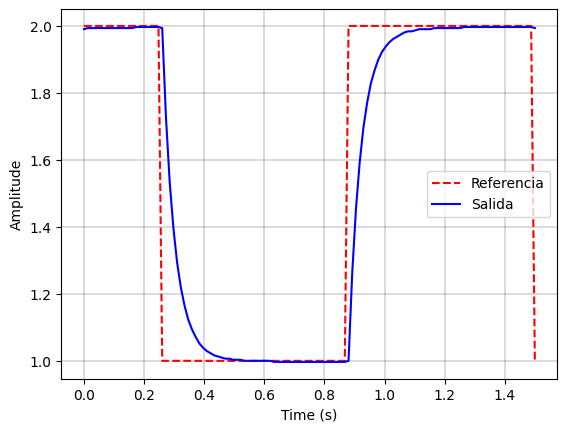

In [121]:
r = [ 2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000]
y = [ 1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99355,1.72903,1.53548,1.39677,1.29355,1.21935,1.16452,1.12258,1.09355,1.07097,1.05161,1.03871,1.02903,1.02258,1.01613,1.01290,1.00968,1.00645,1.00645,1.00323,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.00000,1.26452,1.45484,1.59355,1.69677,1.77097,1.82903,1.86774,1.90000,1.92258,1.93871,1.95161,1.96129,1.96774,1.97419,1.98064,1.98387,1.98387,1.98710,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99355]

t = np.linspace(0, 1.5, len(r))

Init = 52
Fin = 102
yrise_ol = y[Init:Fin]
trise_ol = np.linspace(0, 1, len(yrise_ol))
rTime_ol= calculaterisetime( yrise_ol, trise_ol,1.1,1.8)
print("Tiempo se subida de la salida a lazo abierto: ",rTime_ol)

# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()


### Lazo cerrado

Luego utilizando la opción 1 del Jupyter [Pole_Placement.ipynb](Pole_Placement.ipynb) se calculan las ganancias K y K0 modificando la parte real de los polos por un factor de 1.3.

K = [0.12789971, 0.13083942]

K0 = 1.25873913

En el código de la placa se puede modificar este valor en línea 60 del archivo [ppTask.c](implementacion_pp_rtos/src/ppTask.c).

Tiempo se subida de la salida a lazo abierto:  0.10204081632653067
Tiempo se subida de la salida con control Pole placement:  0.08163265306122452
Mejora en el tiempo se subida:  120.00000000000001
Sobre pico Pole Placement:  0.1615000000000033


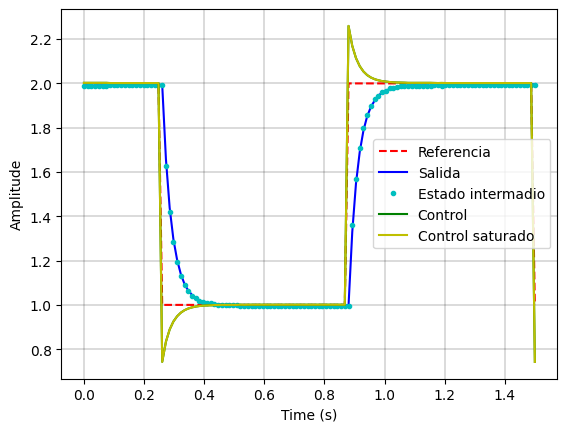

In [122]:
r = [ 2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000]
y = [ 1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.65806,1.43871,1.29677,1.20323,1.13871,1.09355,1.06452,1.04516,1.02903,1.01935,1.01290,1.00968,1.00645,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.32903,1.54839,1.69032,1.78710,1.85161,1.89355,1.92258,1.94516,1.95806,1.96774,1.97419,1.98064,1.98387,1.98387,1.98710,1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677]
y_2 = [ 1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.62581,1.41935,1.28387,1.19355,1.13226,1.09032,1.06129,1.04194,1.02903,1.01935,1.01290,1.00968,1.00645,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.36129,1.56774,1.70645,1.79677,1.85806,1.90000,1.92903,1.94516,1.96129,1.96774,1.97742,1.98064,1.98387,1.98710,1.98710,1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355]
u = [ 2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,0.74293,0.83386,0.88896,0.92486,0.94866,0.96494,0.97621,0.98372,0.98873,0.99249,0.99499,0.99666,0.99750,0.99833,0.99917,0.99958,1.00000,1.00000,1.00000,1.00000,1.00000,1.00083,1.00041,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,2.25957,2.16948,2.11437,2.07806,2.05385,2.03757,2.02672,2.01921,2.01419,2.01044,2.00835,2.00626,2.00501,2.00417,2.00376,2.00334,2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00209,2.00167,2.00208,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,0.74251]
uSat = [ 2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,0.74293,0.83386,0.88896,0.92486,0.94866,0.96494,0.97621,0.98372,0.98873,0.99249,0.99499,0.99666,0.99750,0.99833,0.99917,0.99958,1.00000,1.00000,1.00000,1.00000,1.00000,1.00083,1.00041,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,1.00083,2.25957,2.16948,2.11437,2.07806,2.05385,2.03757,2.02672,2.01921,2.01419,2.01044,2.00835,2.00626,2.00501,2.00417,2.00376,2.00334,2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00250,2.00209,2.00167,2.00208,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,2.00167,0.74251]


t = np.linspace(0, 1.5, len(r))
Init = 52
Fin = 102
yrise_cl = y[Init:Fin]
trise_cl = np.linspace(0, 1, len(yrise_cl))
rTime_cl = calculaterisetime( yrise_cl, trise_cl,1.1,1.8)
print("Tiempo se subida de la salida a lazo abierto: ",rTime_ol)
print("Tiempo se subida de la salida con control Pole placement: ",rTime_cl)
time_dif = 100*(1-(rTime_cl-rTime_ol)/rTime_ol)
print("Mejora en el tiempo se subida: ",time_dif)

Pico = 100*(2.0-np.max(y))/2.0
print("Sobre pico Pole Placement: ",Pico)
# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.plot(t, y_2, 'c.', label='Estado intermadio')
plt.plot(t, u, 'g-', label='Control')
plt.plot(t, uSat, 'y-', label='Control saturado')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

### LQR

Utilizando el mísmo código del Pole Placement en la placa se modifican las ganancias ( línea 63 del archivo [ppTask.c](implementacion_pp_rtos/src/ppTask.c)) obtenidas mediante el Jupyter [LQR.ipynb](LQR.ipynb) dando una penalización al mal rendimiento de 10 y una penalización al ezfuerzo del control de 15.

K = [0.21760338 , 0.2226051]

K0 = 1.44020847

Se puede ver que tanto en la simualación del Jupyter como en la aplicación real del sistema la mejora en el tiempo de subida es del 40 %.

Tiempo se subida de la salida con control Pole placement:  0.06122448979591838
Mejora en el tiempo se subida:  -40.00000000000002
Sobre pico LQR:  0.1615000000000033


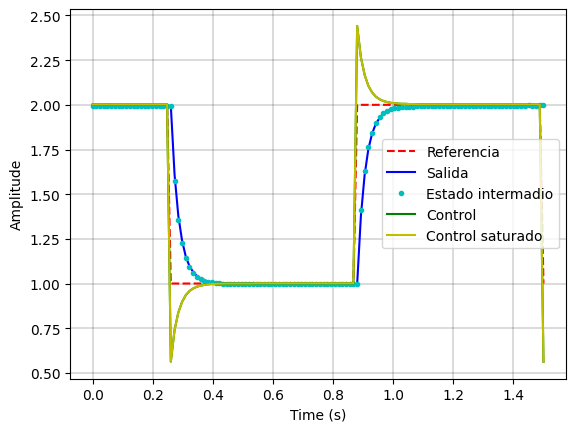

In [123]:
r = [ 2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000]
y = [ 1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.60968,1.38064,1.24194,1.15161,1.09677,1.06452,1.04194,1.02903,1.01935,1.00968,1.00645,1.00645,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.37742,1.60645,1.75161,1.83871,1.89355,1.92581,1.94839,1.96452,1.97419,1.97742,1.98387,1.98710,1.98710,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677]
y_2 = [ 1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.57419,1.35806,1.22903,1.14516,1.09355,1.06129,1.03871,1.02581,1.01613,1.00968,1.00645,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.41290,1.62903,1.76452,1.84516,1.89677,1.93226,1.95161,1.96452,1.97419,1.98064,1.98387,1.98710,1.98710,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99355,1.99355,1.99677,1.99677]
u = [ 2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,0.56263,0.73934,0.83735,0.89631,0.93466,0.95810,0.97230,0.98224,0.98792,0.99218,0.99574,0.99716,0.99786,0.99858,0.99928,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,2.44163,2.26634,2.16833,2.10653,2.06960,2.04616,2.03126,2.02202,2.01562,2.01136,2.00924,2.00710,2.00568,2.00568,2.00426,2.00426,2.00356,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00214,2.00284,2.00284,2.00214,0.56121]
uSat = [ 2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,0.56263,0.73934,0.83735,0.89631,0.93466,0.95810,0.97230,0.98224,0.98792,0.99218,0.99574,0.99716,0.99786,0.99858,0.99928,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,1.00142,2.44163,2.26634,2.16833,2.10653,2.06960,2.04616,2.03126,2.02202,2.01562,2.01136,2.00924,2.00710,2.00568,2.00568,2.00426,2.00426,2.00356,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00284,2.00214,2.00284,2.00284,2.00214,0.56121]


t = np.linspace(0, 1.5, len(r))
Init = 52
Fin = 102
yrise_cl = y[Init:Fin]
trise_cl = np.linspace(0, 1, len(yrise_cl))
rTime_cl = calculaterisetime( yrise_cl, trise_cl,1.1,1.8)
print("Tiempo se subida de la salida con control Pole placement: ",rTime_cl)
time_dif = 100*((rTime_cl-rTime_ol)/rTime_ol)
print("Mejora en el tiempo se subida: ",time_dif)
Pico = 100*(2.0-np.max(y))/2.0
print("Sobre pico LQR: ",Pico)
# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.plot(t, y_2, 'c.', label='Estado intermadio')
plt.plot(t, u, 'g-', label='Control')
plt.plot(t, uSat, 'y-', label='Control saturado')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

## Observador

El observador se genera con el código de la carpeta [observador_rtos](observador_rtos).

### Lazo abierto

Tiempo se subida de la salida a lazo abierto:  0.10204081632653067


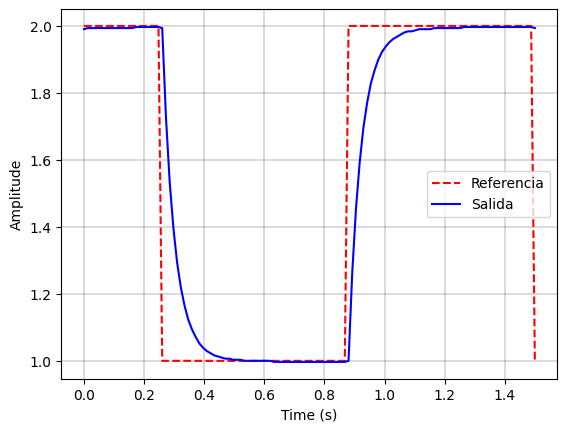

In [124]:
r = [ 2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000]
y = [ 1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99355,1.72903,1.53548,1.39677,1.29355,1.21935,1.16452,1.12258,1.09355,1.07097,1.05161,1.03871,1.02903,1.02258,1.01613,1.01290,1.00968,1.00645,1.00645,1.00323,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.00000,1.26452,1.45484,1.59355,1.69677,1.77097,1.82903,1.86774,1.90000,1.92258,1.93871,1.95161,1.96129,1.96774,1.97419,1.98064,1.98387,1.98387,1.98710,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99355]

t = np.linspace(0, 1.5, len(r))

Init = 52
Fin = 102
yrise_ol = y[Init:Fin]
trise_ol = np.linspace(0, 1, len(yrise_ol))
rTime_ol= calculaterisetime( yrise_ol, trise_ol,1.1,1.8)
print("Tiempo se subida de la salida a lazo abierto: ",rTime_ol)

# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

### Lazo cerrado

Luego utilizando el Jupyter [Observador.ipynb](Observador.ipynb) se calculan las ganancias K y K0 modificando la parte real de los polos por un factor de 1.35.

K = [0.053518125 , 0.0547959087]

K0 = 1.12777838

L = 0.0175

En el código de la placa se puede modificar este valor en línea 58 del archivo [obsTask.c](observador_rtos/src/obsTask.c).

Tiempo se subida de la salida a lazo abierto:  0.10204081632653067
Tiempo se subida de la salida con observador:  0.22448979591836732
Mejora en el tiempo se subida:  119.99999999999984
Sobre pico Pole Placement:  -18.064499999999995


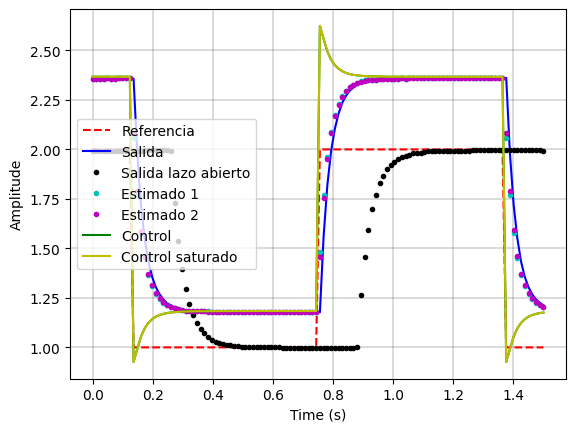

In [125]:
y_ol = [ 1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99355,1.72903,1.53548,1.39677,1.29355,1.21935,1.16452,1.12258,1.09355,1.07097,1.05161,1.03871,1.02903,1.02258,1.01613,1.01290,1.00968,1.00645,1.00645,1.00323,1.00323,1.00323,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,0.99677,1.00000,1.26452,1.45484,1.59355,1.69677,1.77097,1.82903,1.86774,1.90000,1.92258,1.93871,1.95161,1.96129,1.96774,1.97419,1.98064,1.98387,1.98387,1.98710,1.99032,1.99032,1.99032,1.99032,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99355,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99677,1.99355]

# r = [ 2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000]
# y = [ 2.35484,2.35484,2.35484,2.35484,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,1.97419,1.71613,1.54194,1.42258,1.34194,1.28710,1.25161,1.22903,1.21290,1.20000,1.19355,1.19032,1.18710,1.18387,1.18387,1.18387,1.18064,1.18064,1.18064,1.18064,1.18064,1.18064,1.18064,1.18064,1.18064,1.18064,1.18064,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17419,1.55806,1.81935,1.99355,2.11290,2.19355,2.24839,2.28387,2.30645,2.32581,2.33548,2.34194,2.34839,2.35161,2.35161,2.35484,2.35484,2.35484,2.35484,2.35484,2.35484,2.35484,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.36129,2.35806,2.35806,2.36129,2.36129,2.36129,2.36129,2.36129,1.97419,1.71935,1.54194,1.42581,1.34516,1.29032,1.25484,1.22903,1.21290,1.20323]
# x1_hat = [ 2.36337,2.36343,2.36347,2.36350,2.36371,2.36385,2.36395,2.36402,2.36407,2.36410,2.36413,2.06110,1.83983,1.67083,1.54313,1.44735,1.37603,1.32324,1.28446,1.25618,1.23558,1.22050,1.20964,1.20190,1.19633,1.19227,1.18945,1.18749,1.18594,1.18486,1.18411,1.18359,1.18323,1.18298,1.18280,1.18268,1.18259,1.18254,1.18249,1.18228,1.18212,1.18202,1.18195,1.18189,1.18186,1.18183,1.18182,1.18181,1.18180,1.18179,1.18179,1.18178,1.18178,1.18178,1.18178,1.18178,1.18178,1.18178,1.18178,1.18178,1.18178,1.48463,1.70578,1.87488,2.00266,2.09850,2.16985,2.22266,2.26146,2.28975,2.31055,2.32558,2.33640,2.34431,2.34999,2.35394,2.35687,2.35891,2.36033,2.36131,2.36200,2.36247,2.36280,2.36322,2.36352,2.36372,2.36386,2.36396,2.36403,2.36407,2.36411,2.36413,2.36414,2.36416,2.36416,2.36417,2.36417,2.36417,2.36418,2.36418,2.36418,2.36418,2.36418,2.36418,2.36437,2.36431,2.36427,2.36443,2.36455,2.36463,2.36468,2.06168,1.84023,1.67130,1.54345,1.44776,1.37651,1.32376,1.28502,1.25657,1.23585,1.22087]
# x2_hat = [ 2.36331,2.36337,2.36341,2.36344,2.36365,2.36380,2.36390,2.36398,2.36403,2.36406,2.36408,2.08720,1.85933,1.68534,1.55385,1.45523,1.38180,1.32743,1.28750,1.25838,1.23716,1.22163,1.21044,1.20247,1.19674,1.19256,1.18965,1.18763,1.18603,1.18492,1.18415,1.18361,1.18324,1.18298,1.18280,1.18268,1.18259,1.18253,1.18249,1.18226,1.18211,1.18200,1.18192,1.18187,1.18183,1.18181,1.18179,1.18178,1.18177,1.18176,1.18176,1.18176,1.18175,1.18175,1.18175,1.18175,1.18175,1.18175,1.18175,1.18175,1.18175,1.45846,1.68620,1.86030,1.99187,2.09054,2.16401,2.21840,2.25835,2.28748,2.30891,2.32438,2.33553,2.34367,2.34952,2.35359,2.35661,2.35871,2.36017,2.36119,2.36189,2.36238,2.36272,2.36315,2.36345,2.36366,2.36381,2.36391,2.36398,2.36403,2.36406,2.36409,2.36410,2.36411,2.36412,2.36413,2.36413,2.36413,2.36414,2.36414,2.36414,2.36414,2.36414,2.36414,2.36433,2.36427,2.36423,2.36440,2.36452,2.36460,2.36465,2.08779,1.85974,1.68582,1.55418,1.45566,1.38229,1.32797,1.28807,1.25877,1.23743,1.22201]
# u = [ 2.36616,2.36614,2.36613,2.36612,2.36611,2.36607,2.36603,2.36601,2.36600,2.36599,2.36598,0.92577,0.99171,1.03985,1.07663,1.10442,1.12526,1.14078,1.15227,1.16071,1.16686,1.17134,1.17462,1.17699,1.17867,1.17988,1.18077,1.18138,1.18181,1.18214,1.18238,1.18254,1.18266,1.18273,1.18279,1.18283,1.18285,1.18287,1.18288,1.18289,1.18294,1.18297,1.18300,1.18301,1.18302,1.18303,1.18304,1.18304,1.18304,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,2.62326,2.55736,2.50923,2.47244,2.44463,2.42378,2.40825,2.39676,2.38832,2.38216,2.37763,2.37436,2.37201,2.37029,2.36905,2.36819,2.36755,2.36711,2.36680,2.36659,2.36644,2.36633,2.36626,2.36617,2.36611,2.36606,2.36603,2.36601,2.36600,2.36599,2.36598,2.36597,2.36597,2.36597,2.36597,2.36597,2.36597,2.36596,2.36596,2.36596,2.36596,2.36596,2.36596,2.36596,2.36592,2.36593,2.36594,2.36591,2.36588,2.36587,0.92565,0.99158,1.03977,1.07653,1.10435,1.12517,1.14067,1.15215,1.16058,1.16678,1.17128]
# uSat = [ 2.36616,2.36614,2.36613,2.36612,2.36611,2.36607,2.36603,2.36601,2.36600,2.36599,2.36598,0.92577,0.99171,1.03985,1.07663,1.10442,1.12526,1.14078,1.15227,1.16071,1.16686,1.17134,1.17462,1.17699,1.17867,1.17988,1.18077,1.18138,1.18181,1.18214,1.18238,1.18254,1.18266,1.18273,1.18279,1.18283,1.18285,1.18287,1.18288,1.18289,1.18294,1.18297,1.18300,1.18301,1.18302,1.18303,1.18304,1.18304,1.18304,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,1.18305,2.62326,2.55736,2.50923,2.47244,2.44463,2.42378,2.40825,2.39676,2.38832,2.38216,2.37763,2.37436,2.37201,2.37029,2.36905,2.36819,2.36755,2.36711,2.36680,2.36659,2.36644,2.36633,2.36626,2.36617,2.36611,2.36606,2.36603,2.36601,2.36600,2.36599,2.36598,2.36597,2.36597,2.36597,2.36597,2.36597,2.36597,2.36596,2.36596,2.36596,2.36596,2.36596,2.36596,2.36596,2.36592,2.36593,2.36594,2.36591,2.36588,2.36587,0.92565,0.99158,1.03977,1.07653,1.10435,1.12517,1.14067,1.15215,1.16058,1.16678,1.17128]


r = [ 2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000]

y = [ 2.35484,2.35484,2.35484,2.35484,2.35806,2.35484,2.35484,2.35806,2.35806,2.35806,2.35806,2.35806,1.97742,1.71613,1.54516,1.43226,1.35484,1.30323,1.26774,1.24194,1.22258,1.21290,1.20323,1.19677,1.19355,1.18710,1.18710,1.18387,1.18387,1.18387,1.18387,1.18064,1.18064,1.18064,1.18064,1.18064,1.18064,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.17742,1.56129,1.81935,1.99032,2.10323,2.18064,2.23548,2.27097,2.29677,2.31290,2.32581,2.33548,2.34194,2.34516,2.34839,2.34839,2.35161,2.35484,2.35484,2.35484,2.35484,2.35484,2.35806,2.35484,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.35806,2.36129,2.36129,2.35806,2.35806,2.36129,1.97742,1.71935,1.54839,1.43226,1.35484,1.30323,1.26774,1.24194,1.22581,1.21290]

x1_hat = [ 2.35781,2.35781,2.35781,2.35781,2.36006,2.35789,2.35781,2.36006,2.36015,2.36015,2.36015,2.05711,1.76970,1.57659,1.45018,1.36674,1.30965,1.27152,1.24536,1.22638,1.21217,1.20490,1.19788,1.19311,1.19069,1.18610,1.18592,1.18367,1.18358,1.18358,1.18358,1.18133,1.18124,1.18124,1.18124,1.18124,1.18124,1.17899,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.17890,1.48194,1.77160,1.96254,2.08887,2.17231,2.22940,2.26978,2.29603,2.31501,2.32696,2.33641,2.34351,2.34828,2.35070,2.35304,2.35313,2.35538,2.35772,2.35781,2.35781,2.35781,2.35781,2.36006,2.35789,2.36006,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36015,2.36240,2.36249,2.36023,2.36015,2.05936,1.76979,1.57885,1.45252,1.36683,1.30965,1.27152,1.24536,1.22638,1.21443,1.20498]

x2_hat = [ 2.35759,2.35759,2.35759,2.35759,2.35989,2.35769,2.35759,2.35989,2.35999,2.35999,2.35999,2.08309,1.78756,1.58858,1.45829,1.37231,1.31348,1.27420,1.24724,1.22770,1.21307,1.20555,1.19834,1.19343,1.19092,1.18621,1.18601,1.18370,1.18360,1.18360,1.18360,1.18130,1.18120,1.18120,1.18120,1.18120,1.18120,1.17889,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.17879,1.45570,1.75353,1.95031,2.08050,2.16648,2.22531,2.26689,2.29395,2.31349,2.32582,2.33554,2.34286,2.34777,2.35027,2.35268,2.35278,2.35508,2.35749,2.35759,2.35759,2.35759,2.35759,2.35989,2.35769,2.35989,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.35999,2.36230,2.36240,2.36009,2.35999,2.08540,1.78767,1.59089,1.46070,1.37241,1.31348,1.27420,1.24724,1.22770,1.21537,1.20565]

u = [ 2.36735,2.36735,2.36735,2.36735,2.36735,2.36686,2.36733,2.36735,2.36686,2.36684,2.36684,0.92663,0.99258,1.05512,1.09714,1.12465,1.14280,1.15523,1.16352,1.16921,1.17334,1.17644,1.17802,1.17955,1.18058,1.18111,1.18211,1.18215,1.18264,1.18266,1.18266,1.18266,1.18315,1.18317,1.18317,1.18317,1.18317,1.18317,1.18366,1.18368,1.18368,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,2.62388,2.55794,2.49491,2.45336,2.42587,2.40772,2.39529,2.38651,2.38079,2.37666,2.37406,2.37201,2.37046,2.36942,2.36890,2.36839,2.36837,2.36788,2.36737,2.36735,2.36735,2.36735,2.36735,2.36686,2.36733,2.36686,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36635,2.36633,2.36682,0.92663,0.99208,1.05510,1.09665,1.12414,1.14278,1.15523,1.16352,1.16921,1.17334,1.17595]

uSat = [ 2.36735,2.36735,2.36735,2.36735,2.36735,2.36686,2.36733,2.36735,2.36686,2.36684,2.36684,0.92663,0.99258,1.05512,1.09714,1.12465,1.14280,1.15523,1.16352,1.16921,1.17334,1.17644,1.17802,1.17955,1.18058,1.18111,1.18211,1.18215,1.18264,1.18266,1.18266,1.18266,1.18315,1.18317,1.18317,1.18317,1.18317,1.18317,1.18366,1.18368,1.18368,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,1.18367,2.62388,2.55794,2.49491,2.45336,2.42587,2.40772,2.39529,2.38651,2.38079,2.37666,2.37406,2.37201,2.37046,2.36942,2.36890,2.36839,2.36837,2.36788,2.36737,2.36735,2.36735,2.36735,2.36735,2.36686,2.36733,2.36686,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36684,2.36635,2.36633,2.36682,0.92663,0.99208,1.05510,1.09665,1.12414,1.14278,1.15523,1.16352,1.16921,1.17334,1.17595]
t = np.linspace(0, 1.5, len(r))
Init = 52
Fin = 102
yrise_cl = y[Init:Fin]
trise_cl = np.linspace(0, 1, len(yrise_cl))
rTime_cl = calculaterisetime( yrise_cl, trise_cl,1.1,1.8)
print("Tiempo se subida de la salida a lazo abierto: ",rTime_ol)
print("Tiempo se subida de la salida con observador: ",rTime_cl)
time_dif = 100*((rTime_cl-rTime_ol)/rTime_ol)
print("Mejora en el tiempo se subida: ",time_dif)

Pico = 100*(2.0-np.max(y))/2.0
print("Sobre pico Pole Placement: ",Pico)
# Plot the results
plt.grid(color='k', linestyle='-', linewidth=0.2)
plt.plot(t, r, 'r--', label='Referencia')
plt.plot(t, y, 'b-', label='Salida')
plt.plot(t, y_ol, 'k.', label='Salida lazo abierto')
plt.plot(t, x1_hat, 'c.', label='Estimado 1')
plt.plot(t, x2_hat, 'm.', label='Estimado 2')
plt.plot(t, u, 'g-', label='Control')
plt.plot(t, uSat, 'y-', label='Control saturado')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()